In [3]:
import pandas as pd

# classic

Step 1: load data

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                header=None)

Step 2: label encode  

In [5]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
le.transform(['B', 'M'])

array([0, 1])

Step 3: train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=.3,
                                                    random_state=1,
                                                    stratify=y)

In [11]:
import numpy as np

In [12]:
np.bincount(y_train), np.bincount(y_test)

(array([250, 148]), array([107,  64]))

# combining transformers and estimators
**pipeline make_pipeline**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [14]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression()
)

In [15]:
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

## evaluate

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(pipe_lr.predict(X_test), y_test)

0.9415204678362573

# Stratified k-fold cross validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [28]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

In [33]:
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    y_predict = pipe_lr.predict(X_train[test])
    score = accuracy_score(y_train[test], y_predict)
    scores.append(score)
    print('Fold: {}, Class distr.: {}, Acc.: {}'.\
         format(k+1, np.bincount(y_train), score))

Fold: 1, Class distr.: [250 148], Acc.: 0.925
Fold: 2, Class distr.: [250 148], Acc.: 0.95
Fold: 3, Class distr.: [250 148], Acc.: 0.95
Fold: 4, Class distr.: [250 148], Acc.: 0.95
Fold: 5, Class distr.: [250 148], Acc.: 0.875
Fold: 6, Class distr.: [250 148], Acc.: 1.0
Fold: 7, Class distr.: [250 148], Acc.: 0.925
Fold: 8, Class distr.: [250 148], Acc.: 0.925
Fold: 9, Class distr.: [250 148], Acc.: 0.9743589743589743
Fold: 10, Class distr.: [250 148], Acc.: 0.9743589743589743


In [38]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)

In [39]:
print(f'acc. mean: {mean_acc:.3f} +/- {std_acc:.3f}')

acc. mean: 0.945 +/- 0.033


## stratified k-fold cross validation scorer

In [41]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(
    pipe_lr,
    X_train, y_train,
    cv = 10,
    n_jobs = 1
)

In [45]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'acc. mean: {mean_acc:.3f} +/- {std_acc:.3f}')

acc. mean: 0.945 +/- 0.033


## learning curve method in sklearn 
**with**
- **stratified k-fold cross validation**
- **pipeline**

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [64]:
pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    Perceptron()
)

In [68]:
skf = StratifiedKFold(n_splits=10)

In [46]:
from sklearn.model_selection import learning_curve

In [83]:
train_sizes, train_scores, test_scores = learning_curve(
    pipe_lr, 
    X_train, y_train,
    train_sizes=np.linspace(.1, 1., 10),
    cv=skf,
    n_jobs=8,
    verbose=1
)

[learning_curve] Training set sizes: [ 35  71 107 143 179 214 250 286 322 358]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


**visualize**

In [84]:
from matplotlib import pyplot as plt

In [100]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

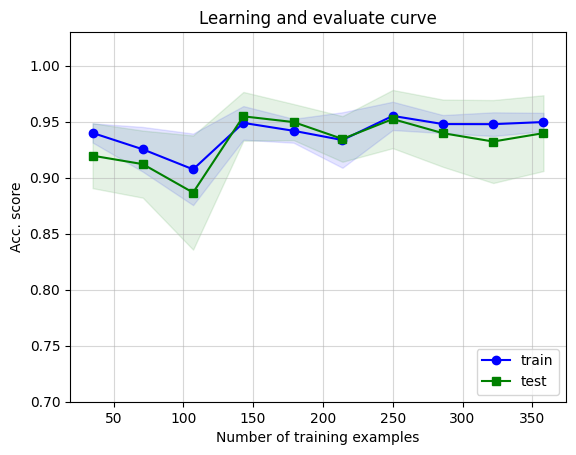

In [117]:
plt.plot(train_sizes, train_mean,
         color='blue',
        marker='o', ls='-', 
        label='train')
plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                color='blue',
                alpha=.1)

plt.plot(train_sizes, test_mean,
         color='green',
         marker='s', ls='-',
        label='test')
plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 color='green',
                 alpha=.1)

plt.legend(loc='lower right')
plt.grid(alpha=.5)
plt.title('Learning and evaluate curve')
plt.xlabel('Number of training examples')
plt.ylabel('Acc. score', rotation=90)
plt.ylim(.7, 1.03)
plt.show()